In [1]:
# Import required modules
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from datetime import datetime, timedelta

# Define the filepath to the MAR.nc and RACMO.nc datasets provided by Mankoff (2020)
racmo_ds = xr.open_dataset('R:/datasets/Mankoff_2020/RACMO.nc')
mar_ds = xr.open_dataset('R:/datasets/Mankoff_2020/MAR.nc')

In [2]:
# KOGE BUGT C 
start_date = '2016-01-01'
end_date = '2023-12-31'
KBC_basin_id = [72219] 

    ## RACMO ##
KBC_racmo_discharge = racmo_ds['discharge'].sel(station=KBC_basin_id)
KBC_racmo_discharge_2009_2023 = KBC_racmo_discharge.sel(time=slice(start_date, end_date))
KBC_racmo_cumulative_volume_daily = KBC_racmo_discharge_2009_2023 * 86400 # Convert m3/s to m3/day
KBC_racmo_cumulative_volume_yearly = KBC_racmo_cumulative_volume_daily.resample(time='A').sum()
KBC_racmo_cumulative_volume_yearly_squeezed = KBC_racmo_cumulative_volume_yearly.squeeze()

    ## MAR ##
KBC_mar_discharge = mar_ds['discharge'].sel(station=KBC_basin_id)
KBC_mar_discharge_2009_2023 = KBC_mar_discharge.sel(time=slice(start_date, end_date))
KBC_mar_cumulative_volume_daily = KBC_mar_discharge_2009_2023 * 86400 # Convert m3/s to m3/day
KBC_mar_cumulative_volume_yearly = KBC_mar_cumulative_volume_daily.resample(time='A').sum()
KBC_mar_cumulative_volume_yearly_squeezed = KBC_mar_cumulative_volume_yearly.squeeze()

In [3]:
# Define the basin IDs (CAT) for Koge Bugt North
basin_ids = [72181, 72177, 72158, 72148] 

# Extract the RACMO and MAR discharge data for the specified basin IDs
KBN_racmo_discharge = racmo_ds['discharge'].sel(station=basin_ids)
KBN_mar_discharge = mar_ds['discharge'].sel(station=basin_ids)

# Extract the RACMO and MAR discharge data between 2016 and 2024
start_date = '2016-01-01'
end_date = '2023-12-31'
KBN_racmo_discharge_2009_2023 = KBN_racmo_discharge.sel(time=slice(start_date, end_date))
KBN_mar_discharge_2009_2023 = KBN_mar_discharge.sel(time=slice(start_date, end_date))

# For the RACMO and MAR datasets, calculate the cumulative daily, monthly and annual runoff for each specified basin
KBN_racmo_cumulative_volume_daily = KBN_racmo_discharge_2009_2023 * 86400 # Convert m3/s to m3/day
KBN_racmo_cumulative_volume_yearly = KBN_racmo_cumulative_volume_daily.resample(time='Y').sum()
KBN_mar_cumulative_volume_daily = KBN_mar_discharge_2009_2023 * 86400 # Convert m3/s to m3/day
KBN_mar_cumulative_volume_yearly = KBN_mar_cumulative_volume_daily.resample(time='Y').sum()

# For the RACMO and MAR datasets, calculate the combined cumulative yearly runoff across all the specified basins
KBN_racmo_cumulative_volume_yearly_all = KBN_racmo_cumulative_volume_yearly.sum(dim='station')
KBN_mar_cumulative_volume_yearly_all = KBN_mar_cumulative_volume_yearly.sum(dim='station')

In [4]:
# Define the basin IDs (CAT) for Koge Bugt South
basin_ids = [72463, 72457, 72447, 72441, 72430, 72422] 

# Extract the RACMO and MAR discharge data for the specified basin IDs
KBS_racmo_discharge = racmo_ds['discharge'].sel(station=basin_ids)
KBS_mar_discharge = mar_ds['discharge'].sel(station=basin_ids)

# Extract the RACMO and MAR discharge data between 2016 and 2024
start_date = '2016-01-01'
end_date = '2023-12-31'
KBS_racmo_discharge_2009_2023 = KBS_racmo_discharge.sel(time=slice(start_date, end_date))
KBS_mar_discharge_2009_2023 = KBS_mar_discharge.sel(time=slice(start_date, end_date))

# For the RACMO and MAR datasets, calculate the cumulative daily, monthly and annual runoff for each specified basin
KBS_racmo_cumulative_volume_daily = KBS_racmo_discharge_2009_2023 * 86400 # Convert m3/s to m3/day
KBS_racmo_cumulative_volume_yearly = KBS_racmo_cumulative_volume_daily.resample(time='Y').sum()
KBS_mar_cumulative_volume_daily = KBS_mar_discharge_2009_2023 * 86400 # Convert m3/s to m3/day
KBS_mar_cumulative_volume_yearly = KBS_mar_cumulative_volume_daily.resample(time='Y').sum()

# For the RACMO and MAR datasets, calculate the combined cumulative daily and yearly runoff across all the specified basins
KBS_racmo_cumulative_volume_yearly_all = KBS_racmo_cumulative_volume_yearly.sum(dim='station')
KBS_mar_cumulative_volume_yearly_all = KBS_mar_cumulative_volume_yearly.sum(dim='station')


In [5]:
# Extract the year from a consistent dataset (e.g., KBC RACMO)
years = KBC_racmo_cumulative_volume_yearly_squeezed['time.year'].values

# Create a DataFrame to store the annual cumulative runoff
annual_runoff_df = pd.DataFrame({"Year": years,
    "KBC_RACMO": KBC_racmo_cumulative_volume_yearly_squeezed.values,
    "KBC_MAR": KBC_mar_cumulative_volume_yearly_squeezed.values,
    "KBN_RACMO": KBN_racmo_cumulative_volume_yearly_all.values,
    "KBN_MAR": KBN_mar_cumulative_volume_yearly_all.values,
    "KBS_RACMO": KBS_racmo_cumulative_volume_yearly_all.values,
    "KBS_MAR": KBS_mar_cumulative_volume_yearly_all.values})

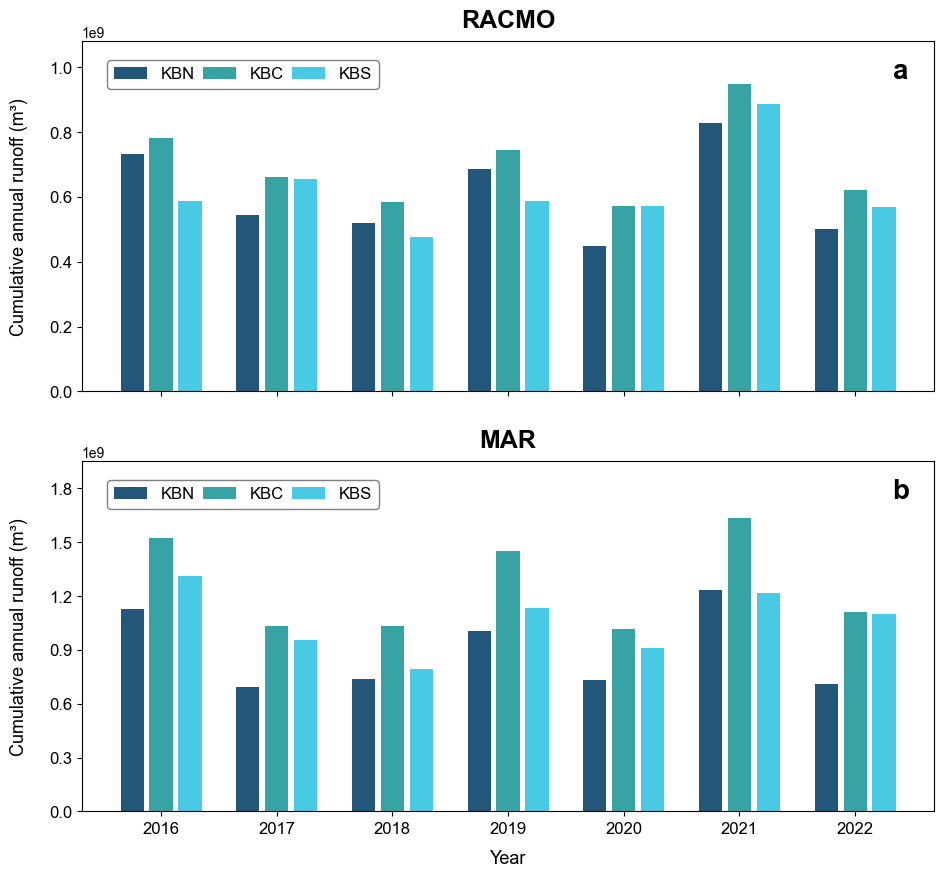

In [ ]:
# Plot Figure S4
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
plt.rcParams["font.family"] = "Arial"
years = annual_runoff_df["Year"]
x = np.arange(len(years)) 
bar_width = 0.2
intra_group_gap = 0.05  
x_kbn = x - (bar_width + intra_group_gap)
x_kbc = x
x_kbs = x + (bar_width + intra_group_gap)

axes[0].bar(x_kbn, annual_runoff_df["KBN_RACMO"], width=bar_width, color='#22577a', label="KBN")
axes[0].bar(x_kbc, annual_runoff_df["KBC_RACMO"], width=bar_width, color='#38a3a5', label="KBC")
axes[0].bar(x_kbs, annual_runoff_df["KBS_RACMO"], width=bar_width, color='#48cae4', label="KBS")
axes[0].set_title("RACMO", fontsize=18, fontweight='bold', pad=10)
axes[0].set_ylabel("Cumulative annual runoff (m³)", labelpad=15, fontsize=13)
axes[0].set_ylim(0, 1.08e9)  
axes[0].legend(loc='upper left', bbox_to_anchor=(0.02, 0.97), fontsize=12, edgecolor='grey', facecolor='white', framealpha=1, ncol=3, columnspacing=0.5)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].text(0.97, 0.95, "a", transform=axes[0].transAxes, fontsize=20, fontweight='bold', ha='right', va='top')

axes[1].bar(x_kbn, annual_runoff_df["KBN_MAR"], width=bar_width, color='#22577a', label="KBN")
axes[1].bar(x_kbc, annual_runoff_df["KBC_MAR"], width=bar_width, color='#38a3a5', label="KBC")
axes[1].bar(x_kbs, annual_runoff_df["KBS_MAR"], width=bar_width, color='#48cae4', label="KBS")
axes[1].set_title("MAR", fontsize=18, fontweight='bold', pad=10)
axes[1].set_ylabel("Cumulative annual runoff (m³)", labelpad=15, fontsize=13)
axes[1].set_xlabel("Year", labelpad=10, fontsize=13)
axes[1].set_ylim(0, 1.95e9)  
axes[1].set_yticks(np.arange(0, 1.81e9, 0.3e9)) 
axes[1].legend(loc='upper left', bbox_to_anchor=(0.02, 0.97), fontsize=12, edgecolor='grey', facecolor='white', framealpha=1, ncol=3, columnspacing=0.5)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].text(0.97, 0.95, "b", transform=axes[1].transAxes, fontsize=20, fontweight='bold', ha='right', va='top')

plt.xticks(x, years)
plt.subplots_adjust(hspace=0.2)
#plt.savefig('R:/KOGE_BUGT/github/figures/Figure_S4.png', dpi=300, bbox_inches='tight')
plt.show()